In [1]:
import numpy as np
from astropy import coordinates as coo
from astropy import units as u
import healpy as hp
import matplotlib.pyplot as plt
import multiprocessing as mp
from astropy.io import fits

In [2]:
res = np.loadtxt('quasar_lss_sigma_2048')
r = res[:,0]
sig = res[:,1]

[]

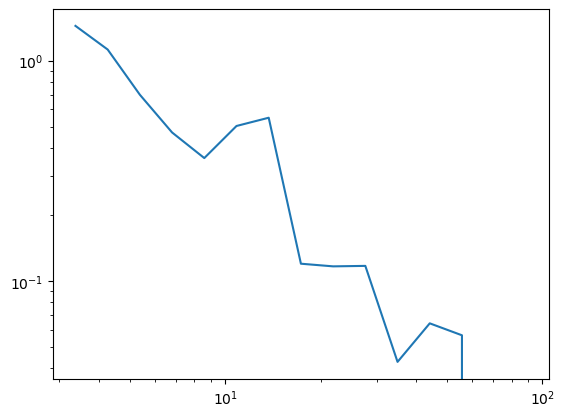

In [4]:
plt.plot(r, sig)
plt.loglog()

In [27]:
def func(x, A, b, A2, sigma, loc):
    power_law = A*x**(-b)
    gaussian = A2*np.exp(-(x-loc)**2/sigma)
    return power_law + gaussian

def func_sep(x, A, b, A2, sigma, loc):
    power_law = A*x**(-b)
    gaussian = A2*np.exp(-(x-loc)**2/sigma)
    return power_law, gaussian

In [7]:
from scipy.optimize import curve_fit

In [13]:
func(r, 1, 0.8, 1, 30, 10)

In [28]:
result = curve_fit(func, r, sig, sigma=res[:,2], p0=(1, 0.8, 1, 30, 10))

/tmp/ipykernel_3533083/1124259789.py:3: RuntimeWarning: overflow encountered in exp
  gaussian = A2*np.exp(-(x-loc)**2/sigma)


In [29]:
result[0]

array([ 9.06871183,  1.48921942,  2.02746965,  1.07047425, 12.35678907])

In [31]:
p, g = func_sep(r, *result[0])

In [32]:
y_est = func(r, *result[0])

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


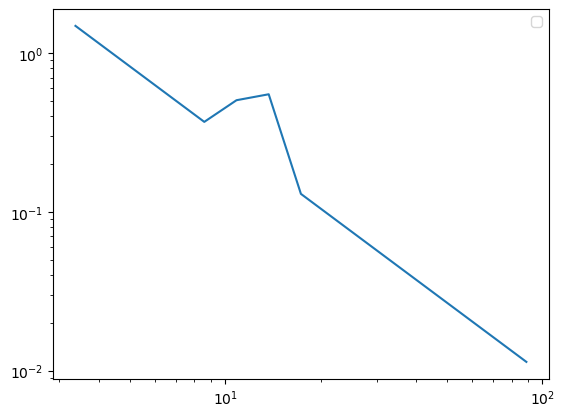

In [36]:
plt.plot(r, y_est)
# plt.plot(r, p, label='power')
# plt.plot(r, g, label='gaussian')
plt.loglog()

plt.legend()

In [37]:
func_fit = lambda x: func(x, *result[0])

In [5]:
import scipy.integrate as integ

In [48]:
def func_x_area(x, A, b, A2, sigma, loc):
    power_law = A*x**(1-b) * 2 * np.pi
    gaussian = A2*np.exp(-(x-loc)**2/sigma)*2*np.pi*x
    return power_law + gaussian

In [50]:
esd = np.zeros_like(r)
for i in range(len(r)):
    rr = r[i]
    esd[i] = integ.quad(lambda x: func_x_area(x, *result[0]), 0, rr)[0]/(np.pi*rr*rr) - func_fit(rr)

[]

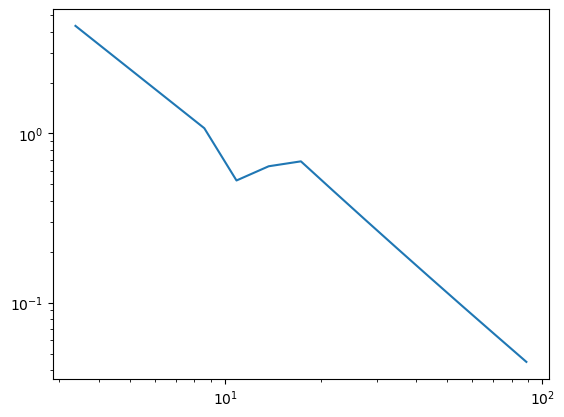

In [53]:
plt.plot(r, esd)
plt.loglog()